# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
cities

['castro',
 'dalaba',
 'la ronge',
 'amderma',
 'jujuy',
 'acari',
 'kodiak',
 'tsihombe',
 'kapaa',
 'victoria',
 'provideniya',
 'nizhneyansk',
 'bluff',
 'koygorodok',
 'rwamagana',
 'tupaciguara',
 'zarinsk',
 'busselton',
 'east london',
 'ada',
 'hermanus',
 'bredasdorp',
 'mareeba',
 'new norfolk',
 'college',
 'yellowknife',
 'hobart',
 'upernavik',
 'cidreira',
 'khandyga',
 'mar del plata',
 'samusu',
 'punta arenas',
 'sarangani',
 'butaritari',
 'bathsheba',
 'hasaki',
 'port alfred',
 'saint-pierre',
 'goderich',
 'samarai',
 'flinders',
 'fairbanks',
 'arraial do cabo',
 'teguldet',
 'marathon',
 'mwene-ditu',
 'logrono',
 'norman wells',
 'cape town',
 'ucluelet',
 'taolanaro',
 'santa barbara',
 'berdigestyakh',
 'tiksi',
 'albany',
 'kupang',
 'chagda',
 'jamestown',
 'constitucion',
 'tura',
 'ushuaia',
 'lebu',
 'iqaluit',
 'carnarvon',
 'vitim',
 'casablanca',
 'sergeyevka',
 'nouadhibou',
 'phek',
 'mataura',
 'cuamba',
 'deniliquin',
 'cap malheureux',
 'palabuhan

In [7]:
# Query gen function
def querygen(api_key='', city=cities):
    url ='https://api.openweathermap.org/data/2.5/weather'

    return f'{url}?q={city}&appid={api_key}&units=imperial'

In [9]:
# City record counter
crec=0

# City max count
cmax=len(cities)

# Append parameters
citylist=[]
clouds=[]
country=[]
date=[]
humidity=[]
latis=[]
longis=[]
maxtemp=[]
wspeed=[]


# Perform weather check
print(f'Beginning Data Retrieval')
print(f'------------------------')
for c in cities:
    crec=crec + 1
    response=requests.get(querygen(api_key=api_key, city=c)).json()

    try:
        print(f'Processing city {crec} of {cmax}: {response["name"]}')
        print(f'------------------------------------------------------')
        citylist.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        latis.append(response['coord']['lat'])
        longis.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        wspeed.append(response['wind']['speed'])
    except:
        pass
        print(f'***********************************************************')
        print(f'Sorry, we could not find weather for {c}')
        print(f'***********************************************************')

print(f'-----------------------')
print(f'Data Retrieval Complete')
print(f'-----------------------')

Beginning Data Retrieval
------------------------
Processing city 1 of 593: Castro
------------------------------------------------------
Processing city 2 of 593: Dalaba
------------------------------------------------------
Processing city 3 of 593: La Ronge
------------------------------------------------------
***********************************************************
Sorry, we could not find weather for amderma
***********************************************************
***********************************************************
Sorry, we could not find weather for jujuy
***********************************************************
Processing city 6 of 593: Acari
------------------------------------------------------
Processing city 7 of 593: Kodiak
------------------------------------------------------
***********************************************************
Sorry, we could not find weather for tsihombe
***********************************************************
Processing city

Processing city 83 of 593: Araouane
------------------------------------------------------
Processing city 84 of 593: Esperance
------------------------------------------------------
Processing city 85 of 593: Yongan
------------------------------------------------------
Processing city 86 of 593: Omboue
------------------------------------------------------
Processing city 87 of 593: Qingdao
------------------------------------------------------
Processing city 88 of 593: Kelowna
------------------------------------------------------
Processing city 89 of 593: Airai
------------------------------------------------------
Processing city 90 of 593: Buin
------------------------------------------------------
***********************************************************
Sorry, we could not find weather for illoqqortoormiut
***********************************************************
Processing city 92 of 593: Khatanga
------------------------------------------------------
Processing city 93 

Processing city 169 of 593: Diego de Almagro
------------------------------------------------------
Processing city 170 of 593: Yar-Sale
------------------------------------------------------
Processing city 171 of 593: Port Blair
------------------------------------------------------
Processing city 172 of 593: Washington DC.
------------------------------------------------------
Processing city 173 of 593: Alofi
------------------------------------------------------
Processing city 174 of 593: Swansea
------------------------------------------------------
Processing city 175 of 593: Hamilton
------------------------------------------------------
Processing city 176 of 593: Sanski Most
------------------------------------------------------
Processing city 177 of 593: Kununurra
------------------------------------------------------
Processing city 178 of 593: Avarua
------------------------------------------------------
Processing city 179 of 593: Pacific Grove
------------------------

Processing city 250 of 593: Camocim
------------------------------------------------------
***********************************************************
Sorry, we could not find weather for tumannyy
***********************************************************
Processing city 252 of 593: Aykhal
------------------------------------------------------
Processing city 253 of 593: Batagay-Alyta
------------------------------------------------------
***********************************************************
Sorry, we could not find weather for krasnoselkup
***********************************************************
Processing city 255 of 593: Kalawit
------------------------------------------------------
Processing city 256 of 593: Terrak
------------------------------------------------------
***********************************************************
Sorry, we could not find weather for grand river south east
***********************************************************
Processing city 258 of 59

Processing city 332 of 593: Juba
------------------------------------------------------
Processing city 333 of 593: Pangnirtung
------------------------------------------------------
Processing city 334 of 593: Laguna
------------------------------------------------------
Processing city 335 of 593: Nikolskoye
------------------------------------------------------
Processing city 336 of 593: Toora-Khem
------------------------------------------------------
Processing city 337 of 593: Narsaq
------------------------------------------------------
Processing city 338 of 593: Coihaique
------------------------------------------------------
Processing city 339 of 593: Sinazongwe
------------------------------------------------------
Processing city 340 of 593: Paita
------------------------------------------------------
Processing city 341 of 593: Ust-Kuyga
------------------------------------------------------
Processing city 342 of 593: Tongliao
-------------------------------------------

Processing city 415 of 593: Kaupanger
------------------------------------------------------
Processing city 416 of 593: Honiara
------------------------------------------------------
Processing city 417 of 593: Mochicahui
------------------------------------------------------
Processing city 418 of 593: Porto Novo
------------------------------------------------------
Processing city 419 of 593: Ulladulla
------------------------------------------------------
Processing city 420 of 593: Saint George
------------------------------------------------------
Processing city 421 of 593: Gobabis
------------------------------------------------------
Processing city 422 of 593: Ures
------------------------------------------------------
Processing city 423 of 593: Kloulklubed
------------------------------------------------------
Processing city 424 of 593: Luwuk
------------------------------------------------------
***********************************************************
Sorry, we could 

Processing city 496 of 593: Sembakung
------------------------------------------------------
Processing city 497 of 593: Lalsot
------------------------------------------------------
Processing city 498 of 593: Laizhou
------------------------------------------------------
Processing city 499 of 593: Half Moon Bay
------------------------------------------------------
***********************************************************
Sorry, we could not find weather for sataua
***********************************************************
***********************************************************
Sorry, we could not find weather for malakal
***********************************************************
Processing city 502 of 593: Kharan
------------------------------------------------------
***********************************************************
Sorry, we could not find weather for asau
***********************************************************
************************************************

Processing city 577 of 593: Chicama
------------------------------------------------------
Processing city 578 of 593: Conde
------------------------------------------------------
Processing city 579 of 593: Isagarh
------------------------------------------------------
Processing city 580 of 593: Ostrov
------------------------------------------------------
Processing city 581 of 593: Jalu
------------------------------------------------------
***********************************************************
Sorry, we could not find weather for kazalinsk
***********************************************************
Processing city 583 of 593: Dalvik
------------------------------------------------------
Processing city 584 of 593: Simpang
------------------------------------------------------
Processing city 585 of 593: Tafresh
------------------------------------------------------
Processing city 586 of 593: Port Macquarie
------------------------------------------------------
Processing cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
df=pd.DataFrame({'City': citylist,
     'Cloudiness': clouds,
     'Country': country,
     'Date': date,
     'Humidity': humidity,
     'Lat': latis,
     'Lon': longis,
     'Max Temp': maxtemp,
     'Wind Speed': wspeed
    })

In [16]:
df.to_csv(output_data_file)

In [17]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Castro,90,CL,1556902800,100,-42.48,-73.76,48.20,1.12
1,Dalaba,96,GN,1556907470,27,10.69,-12.25,95.38,4.52
2,La Ronge,90,CA,1556902800,55,55.10,-105.30,35.60,8.05
3,Acari,10,BR,1556907471,42,-6.44,-36.64,90.52,14.41
4,Kodiak,90,US,1556907433,93,39.95,-94.76,57.20,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

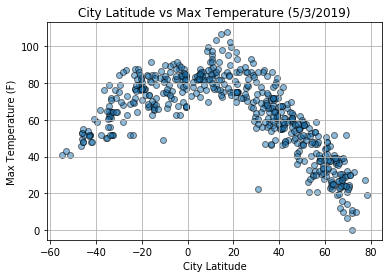

In [33]:
lat_temp=plt.scatter(df['Lat'],df['Max Temp'],edgecolors='black',alpha=0.5)
plt.grid(b=True)
plt.title('City Latitude vs Max Temperature (5/3/2019)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('City Latitude')
plt.savefig('output_data/lat_temp_scatter.png')
plt.show()

#### Latitude vs. Humidity Plot

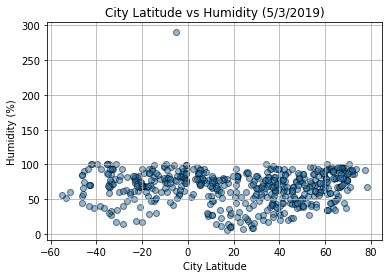

In [34]:
lat_temp=plt.scatter(df['Lat'],df['Humidity'],edgecolors='black',alpha=0.5)
plt.grid(b=True)
plt.title('City Latitude vs Humidity (5/3/2019)')
plt.ylabel('Humidity (%)')
plt.xlabel('City Latitude')
plt.savefig('output_data/lat_humidity_scatter.png')
plt.show()

#### Latitude vs. Cloudiness Plot

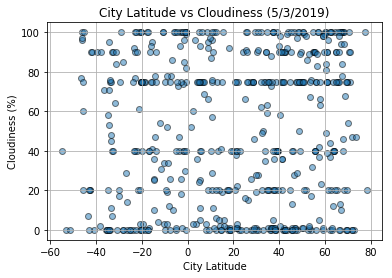

In [35]:
lat_temp=plt.scatter(df['Lat'],df['Cloudiness'],edgecolors='black',alpha=0.5)
plt.grid(b=True)
plt.title('City Latitude vs Cloudiness (5/3/2019)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('City Latitude')
plt.savefig('output_data/lat_cloud_scatter.png')
plt.show()

#### Latitude vs. Wind Speed Plot

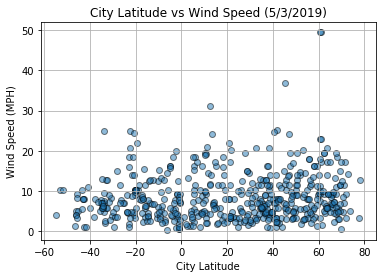

In [36]:
lat_temp=plt.scatter(df['Lat'],df['Wind Speed'],edgecolors='black',alpha=0.5)
plt.grid(b=True)
plt.title('City Latitude vs Wind Speed (5/3/2019)')
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('City Latitude')
plt.savefig('output_data/lat_wind_scatter.png')
plt.show()